<a href="https://colab.research.google.com/github/Ashwini-Padige/Machine-Learning-Algorithms/blob/main/My_Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


**Data Clean**

In [ ]:
df.shape

(400, 5)

In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:

df.Gender = df.Gender.map({'Male' : 1, 'Female' : 0})

In [ ]:
df.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [ ]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [ ]:
q3 = df.Age.quantile(0.75)
q1 = df.Age.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(5.375, 70.375)

In [ ]:
q3 = df.EstimatedSalary.quantile(0.75)
q1 = df.EstimatedSalary.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-24500.0, 155500.0)

In [ ]:

df.drop(['User ID'], axis = 1, inplace = True)

In [ ]:
df.shape

(400, 4)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(380, 4)

In [ ]:

df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

**Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 8)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

**Predicting the Test set results**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, accuracy_score
for depth in range(1,15) :
    dt = DecisionTreeClassifier(max_depth = depth)
    dt.fit(X_train, y_train)
    dt_score = dt.score(X_train, y_train)
    val_score = np.mean(cross_val_score(dt, X_train, y_train, cv = 10, scoring = 'roc_auc'))
    print('Depth : ', depth, 'Train Score : ', dt_score, 'CV Score : ', val_score)

Depth :  1 Train Score :  0.8421052631578947 CV Score :  0.8069017379679144
Depth :  2 Train Score :  0.924812030075188 CV Score :  0.9228943850267382
Depth :  3 Train Score :  0.924812030075188 CV Score :  0.9443599598930481
Depth :  4 Train Score :  0.9360902255639098 CV Score :  0.934730949197861
Depth :  5 Train Score :  0.9511278195488722 CV Score :  0.8960511363636364
Depth :  6 Train Score :  0.9699248120300752 CV Score :  0.8951186497326203
Depth :  7 Train Score :  0.9774436090225563 CV Score :  0.8712901069518717
Depth :  8 Train Score :  0.9887218045112782 CV Score :  0.8706216577540106
Depth :  9 Train Score :  0.9887218045112782 CV Score :  0.8637466577540106
Depth :  10 Train Score :  0.9962406015037594 CV Score :  0.8517012032085562
Depth :  11 Train Score :  0.9962406015037594 CV Score :  0.8593716577540107
Depth :  12 Train Score :  1.0 CV Score :  0.8512466577540106
Depth :  13 Train Score :  1.0 CV Score :  0.8593716577540107
Depth :  14 Train Score :  1.0 CV Score :

In [ ]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_predict = dt.predict(X_test)
y_predict

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1])

In [ ]:
df_predict = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_predict})
df_predict

,Actual,Predicted
0,0,0
324,1,1
25,1,1
122,0,0
165,0,0
...,...,...
369,1,1
13,0,0
251,0,0
233,1,1


In [ ]:
accuracy_score(y_test, y_predict)

0.8771929824561403

**Making the Confusion Matrix**

In [ ]:
confusion_matrix(y_test, y_predict)

array([[68, 10],
       [ 4, 32]])

In [ ]:
f1_score(y_test, y_predict)

0.8205128205128205

**Visualising the Training set results**

<Axes: xlabel='Actual', ylabel='Predicted'>

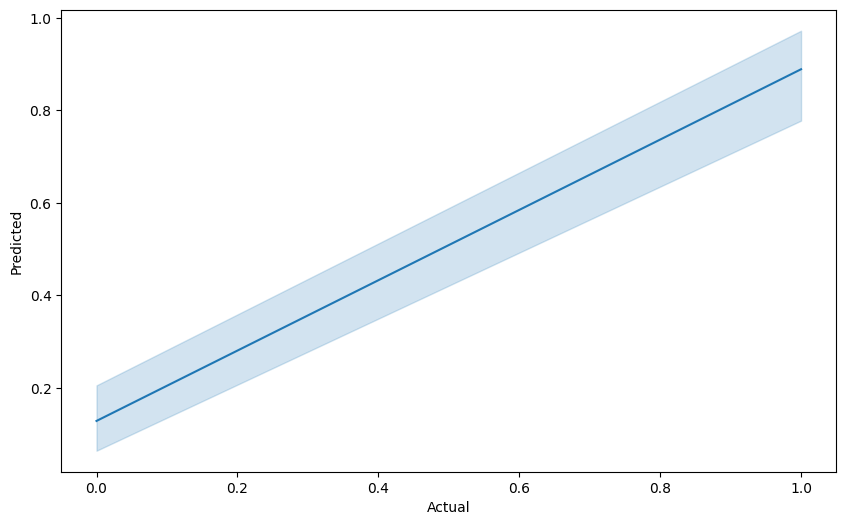

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))
sns.lineplot(x = 'Actual', y = 'Predicted', data = df_predict)

**Visualising the Test set results**

In [ ]:
feature_important = pd.DataFrame(dt.feature_importances_,['Gender', 'Age', 'EstimatedSalary'], columns = ['Important X'])
feature_important

,Important X
Gender,0.000000
Age,0.603362
EstimatedSalary,0.396638


**Visualising the tree**

[Text(0.5, 0.875, 'x[1] <= 0.595\ngini = 0.476\nsamples = 266\nvalue = [162, 104]'),
 Text(0.25, 0.625, 'x[2] <= 0.521\ngini = 0.292\nsamples = 186\nvalue = [153, 33]'),
 Text(0.125, 0.375, 'x[1] <= -0.162\ngini = 0.052\nsamples = 150\nvalue = [146, 4]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 104\nvalue = [104, 0]'),
 Text(0.1875, 0.125, 'gini = 0.159\nsamples = 46\nvalue = [42, 4]'),
 Text(0.375, 0.375, 'x[2] <= 1.782\ngini = 0.313\nsamples = 36\nvalue = [7, 29]'),
 Text(0.3125, 0.125, 'gini = 0.434\nsamples = 22\nvalue = [7, 15]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.75, 0.625, 'x[1] <= 1.164\ngini = 0.2\nsamples = 80\nvalue = [9, 71]'),
 Text(0.625, 0.375, 'x[2] <= -0.825\ngini = 0.287\nsamples = 46\nvalue = [8, 38]'),
 Text(0.5625, 0.125, 'gini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.6875, 0.125, 'gini = 0.393\nsamples = 26\nvalue = [7, 19]'),
 Text(0.875, 0.375, 'x[1] <= 1.922\ngini = 0.057\nsamples = 34\nvalue = [1, 33]'),
 T

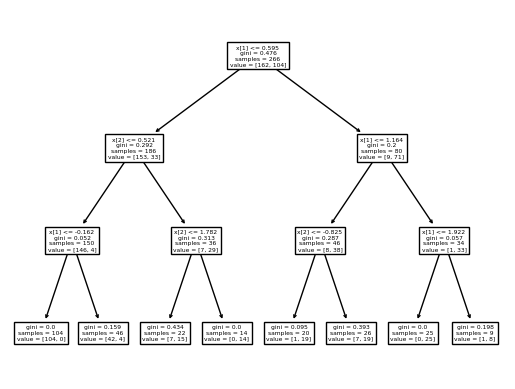

In [ ]:
from sklearn import tree
tree.plot_tree(dt) # dt is the decison tree that I have learnt

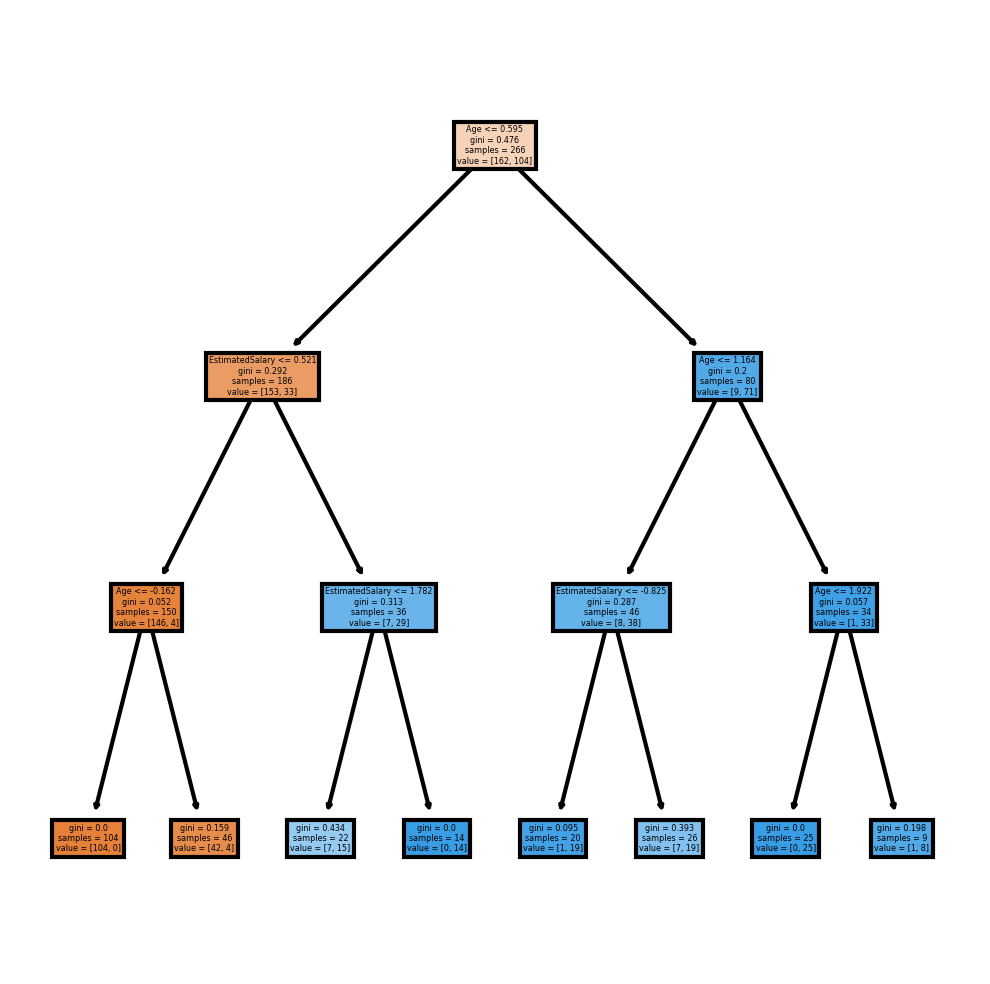

In [ ]:
#plt.figure(figsize = (4,4))
#tree.plot_tree(dt, feature_names =['Gender', 'Age', 'EstimatedSalary'], filled = True)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,feature_names = ['Gender', 'Age', 'EstimatedSalary'],filled = True);
fig.savefig('imagename.png')